In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [15]:
df = pd.read_csv('pokemon.csv')

# Structure of Dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [17]:
#Remove unnecessary columns
pokemon = df[['name','pokedex_number','generation','status','species','type_number','type_1','type_2','height_m','weight_kg',
                     'total_points','hp','attack','defense','sp_attack','sp_defense','speed','catch_rate']]

In [18]:
pokemon.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate
count,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000
mean,437.711089,4.034047,1.527237,1.368093,69.753749,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078
std,259.366480,2.234937,0.499501,3.380126,129.221230,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630
min,1.000000,1.000000,1.000000,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000
25%,213.750000,2.000000,1.000000,0.600000,8.800000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000
50%,433.500000,4.000000,2.000000,1.000000,28.500000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000
75%,663.250000,6.000000,2.000000,1.500000,69.100000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000
max,890.000000,8.000000,2.000000,100.000000,999.900000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000


# Data Wrangling Process

Quality Issues:
- Need to delete entries for "Mega" or Pokemons with alternate forms (these are technically the same pokemon/species and are just directly powered up versions of the base form) in order to keep analysis consistent across the board.
- There are some missing catch rate values 
- Types should be categorical variables.


In [19]:
# Delete the second instance of each entry with a duplicated pokedex number
# because the first instance is always the base form and the rest are all "Mega Evolutions"/Alternate Forms

pokemon = pokemon.drop_duplicates(subset='pokedex_number', keep="first")
pokemon.reset_index(inplace=True)

In [20]:
# It appears that this database we're using is missing catch rate information on the most recent generation of Pokemon.
# Thankfully, we have access to another dataset from Kaggle that does have this catch rate information for the new Pokemon.
# We'll merge this information into our existing dataframe to fix the issue

df2 = pd.read_csv('gen_8.csv')

# Some of the names of our Pokemon still list out monikers for alternate forms instead of just the Pokemon's name.
# We will now remove these monikers to fix this issue.

pokemon['name'][848] = "Toxtricity"
pokemon['name'][874] = "Eiscue"
pokemon['name'][875] = "Indeedee"
pokemon['name'][876] = "Morpeko"
pokemon['name'][887] = "Zacian"
pokemon['name'][888] = "Zamazenta"

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smartjuice\anaconda3\lib\site-p

In [21]:
pokemon = pokemon.merge(df2[['Name','Cap_Rate']], how='left', left_on = 'name',right_on='Name')
for z in range(len(pokemon)):
    if pd.isnull(pokemon['catch_rate'].iloc[z]):
        pokemon['catch_rate'][z] = pokemon['Cap_Rate'][z]
pokemon.set_index('pokedex_number',inplace=True)
pokemon.drop(columns=['Name','Cap_Rate','index'],inplace=True)

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
np.where(pokemon['catch_rate'].isnull())

(array([807, 808, 864, 865], dtype=int64),)

In [23]:
# Since there are only a few left to fill in, we can google search the rest of this missing information and manually fix the missing data
pokemon['catch_rate'][808] = 3
pokemon['catch_rate'][809] = 3
pokemon['catch_rate'][865] = 45
pokemon['catch_rate'][866] = 45

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

In [24]:
pokemon.describe()

,generation,type_number,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate
count,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,4.11236,1.495506,1.182135,63.911011,422.013483,68.702247,76.457303,71.751685,69.660674,69.791011,65.650562,98.597753
std,2.22845,0.500261,1.238048,119.996331,111.847044,25.844566,29.793116,29.530829,29.468244,27.036848,28.064812,76.399224
min,1.00000,1.000000,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000
25%,2.00000,1.000000,0.500000,8.500000,320.000000,50.000000,55.000000,50.000000,45.250000,50.000000,45.000000,45.000000
50%,4.00000,1.000000,1.000000,26.800000,438.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,60.000000
75%,6.00000,2.000000,1.500000,63.000000,500.000000,80.000000,95.000000,90.000000,90.000000,85.000000,85.000000,153.750000
max,8.00000,2.000000,20.000000,999.900000,720.000000,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,255.000000


# Variables of Interest

The biggest variable of interest in our dataset is the "Total Points" - Total Points or Stat Total represents the overall strength and power level of a Pokemon. It would be interesting to see how the other variables have an effect on the distribution of stat totals.

Pokemon Primary Type ('type_1'), Generation, and Status are some of the main variables of interest for our exploration.

# Univariate Exploration

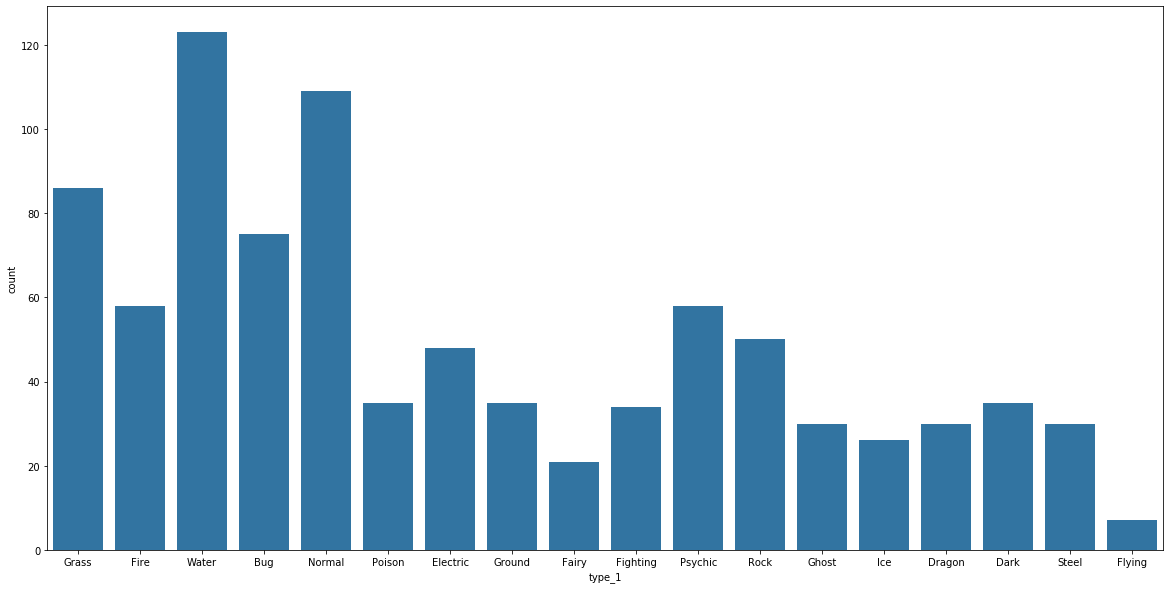

In [35]:
plt.figure(figsize=(20,10))
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon,x='type_1',color=base_color);

It appears that Water and Normal are the most common primary types, while Flying and Fairy are the least common primary types.

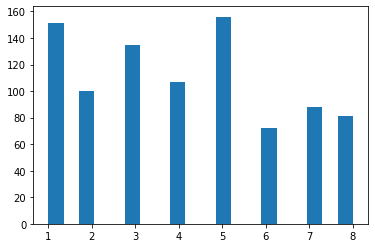

In [32]:
plt.hist(data = pokemon, x = 'generation', bins=20);

Number of new pokemon added per generation was highest in Generations 1-5, and have not quite reached those levels after Generation 6.

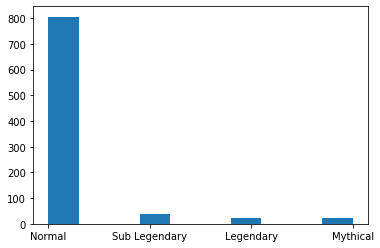

In [27]:
plt.hist(pokemon['status']);

It seems most Pokemon are classified as "Normal", and only a rare few are considered to be Sub Legendary, Legendary, or Mythical. Let's explore this later to see if this rarity has some sort of contribution to predicting overall power/stat total.

Lastly, let's look at what the distribution of Total Stats (Our main variable of interest) looks like:

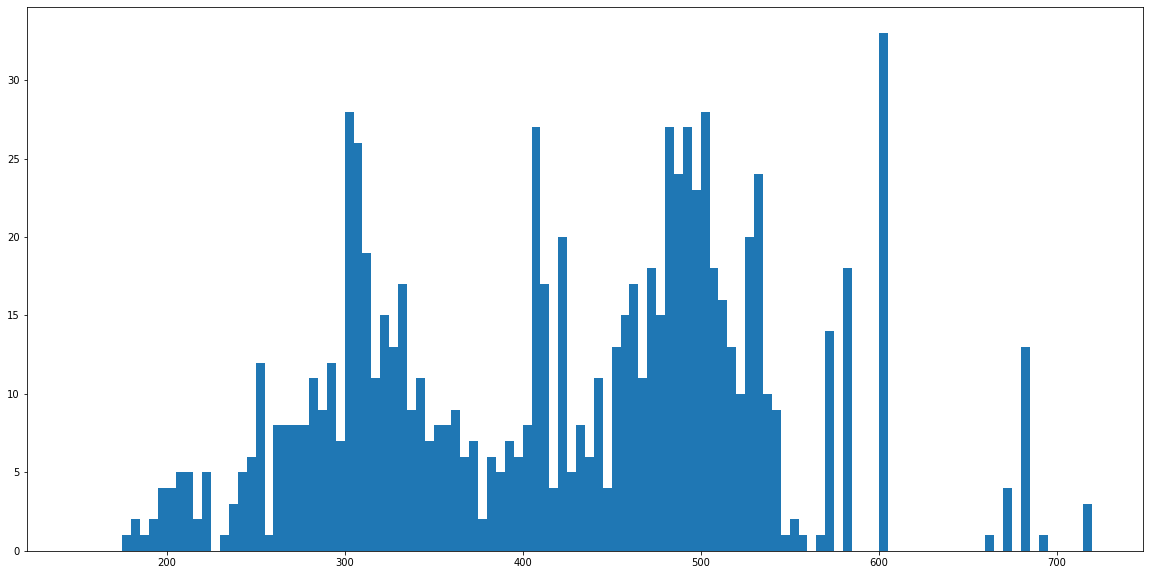

In [40]:
plt.figure(figsize=(20,10))
bins = np.arange(150, pokemon['total_points'].max()+5, 5)
plt.hist(data = pokemon, x = 'total_points', bins = bins);

The distribution appears to be multimodal, with peaks around 300, 400, 500, and 600 stat totals. Let's see if exploring bivariate relationships can provide us a little more detail into this.

# Bivariate Explorations

In [10]:
pokemon.groupby('type_1')[['total_points','hp','attack','defense','sp_attack','sp_defense','speed']].describe()

total_points                                                        \
                count        mean         std    min     25%    50%     75%   
type_1                                                                        
Bug              75.0  373.480000  116.196869  180.0  267.50  390.0  479.00   
Dark             35.0  431.657143  110.479155  220.0  344.00  446.0  510.00   
Dragon           30.0  488.233333  136.669166  270.0  410.00  487.5  600.00   
Electric         48.0  431.562500  105.412040  205.0  352.50  438.0  506.25   
Fairy            21.0  428.285714  135.434539  218.0  323.00  450.0  495.00   
Fighting         34.0  426.529412  107.997821  210.0  340.50  455.0  493.75   
Fire             58.0  443.672414  101.568815  250.0  353.75  465.0  529.50   
Flying            7.0  420.000000  136.473441  245.0  305.00  475.0  515.00   
Ghost            30.0  428.766667   98.915040  275.0  323.75  464.5  497.25   
Grass            86.0  407.918605  102.988773  180.0  316.50  416.5  490.00   
Ground           35.0  424.085714  103.016667  265.0  329.00  430.0  504.00   
Ice              26.0  423.192308  112.552572  185.0  305.00  462.5  514.75   
Normal          109.0  396.614679  110.331899  190.0  290.00  415.0  480.00   
Poison           35.0  412.457143  103.000955  245.0  322.50  448.0  492.00   
Psychic          58.0  450.120690  129.809047  198.0  331.25  470.0  558.75   
Rock             50.0  439.340000   96.222873  240.0  356.75  460.0  507.50   
Steel            30.0  470.100000  110.244040  300.0  390.00  485.0  561.25   
Water           123.0  417.138211  103.894439  175.0  322.50  440.0  496.50   

                    hp             ... sp_defense         speed             \
            max  count       mean  ...        75%    max  count       mean   
type_1                             ...                                       
Bug       600.0   75.0  56.253333  ...      80.00  230.0   75.0  62.026667   
Dark      680.0   35.0  71.771429  ...      80.50  130.0   35.0  73.400000   
Dragon    680.0   30.0  74.400000  ...     100.00  150.0   30.0  78.700000   
Electric  600.0   48.0  62.020833  ...      80.00  100.0   48.0  82.770833   
Fairy     720.0   21.0  72.047619  ...     110.00  154.0   21.0  55.809524   
Fighting  720.0   34.0  71.735294  ...      78.75  145.0   34.0  65.441176   
Fire      680.0   58.0  68.482759  ...      80.00  154.0   58.0  74.896552   
Flying    580.0    7.0  68.285714  ...      82.50   95.0    7.0  82.142857   
Ghost     680.0   30.0  61.366667  ...     105.00  135.0   30.0  57.833333   
Grass     600.0   86.0  65.558140  ...      84.00  129.0   86.0  58.279070   
Ground    670.0   35.0  72.114286  ...      77.50  120.0   35.0  59.742857   
Ice       580.0   26.0  70.500000  ...      90.00  200.0   26.0  59.923077   
Normal    720.0  109.0  76.513761  ...      75.00  135.0  109.0  67.926606   
Poison    690.0   35.0  67.971429  ...      77.00  142.0   35.0  67.942857   
Psychic   680.0   58.0  71.758621  ...     102.25  154.0   58.0  71.293103   
Rock      600.0   50.0  67.120000  ...      90.00  150.0   50.0  53.140000   
Steel     680.0   30.0  70.600000  ...      86.75  150.0   30.0  53.033333   
Water     680.0  123.0  70.016260  ...      85.50  140.0  123.0  65.016260   

                                                       
                std   min    25%   50%     75%    max  
type_1                                                 
Bug       33.229738   5.0  38.00  57.0   85.00  160.0  
Dark      24.258655  35.0  58.00  70.0   93.00  125.0  
Dragon    24.617277  40.0  57.75  81.0   95.00  142.0  
Electric  31.184584  15.0  60.00  90.5  103.50  150.0  
Fairy     32.071201  15.0  34.00  49.0   72.00  148.0  
Fighting  27.102713  25.0  43.50  61.5   80.00  128.0  
Fire      24.386284  20.0  60.25  75.0   93.75  126.0  
Flying    26.251531  55.0  62.00  77.0   98.00  123.0  
Ghost     27.550685  15.0  35.00  53.0   80.00  110.0  
Grass     25.903282  10.0  38.50  56.5

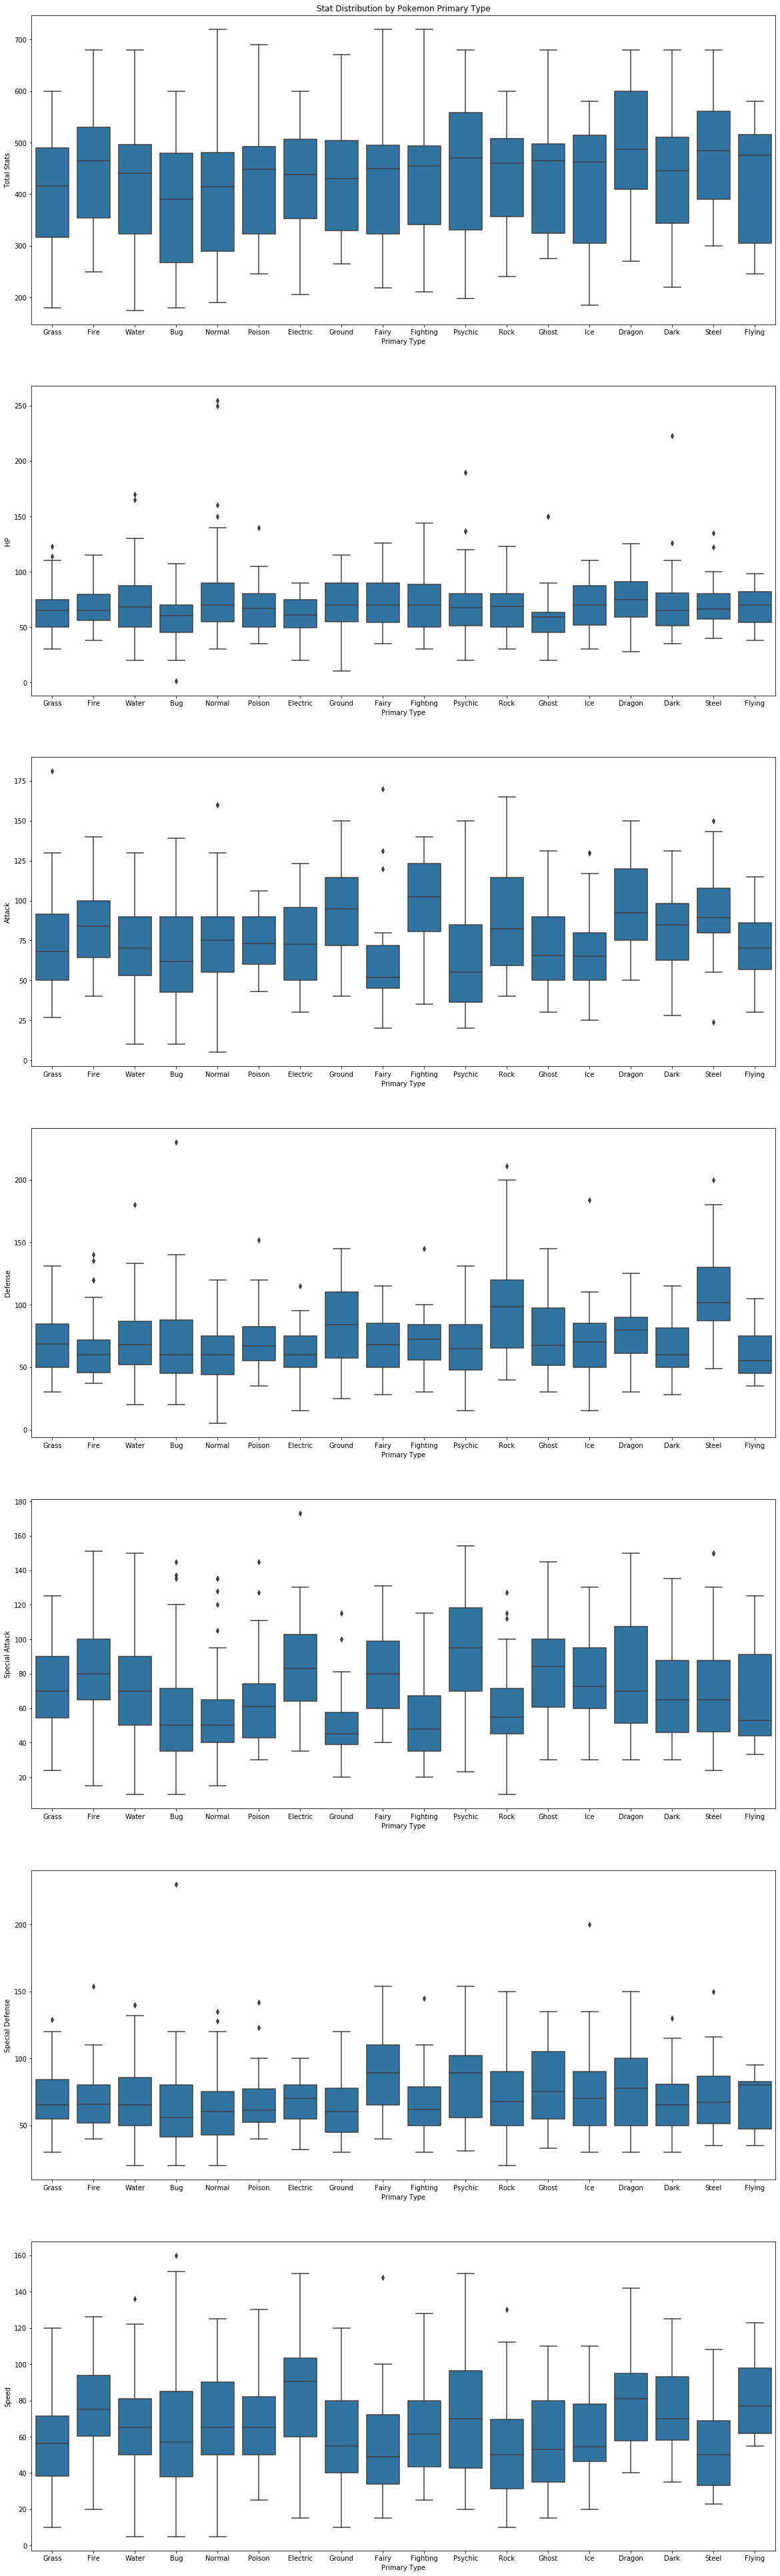

In [100]:
plt.figure(figsize=(20,70))

plt.subplot(7,1,1)
base_color = sb.color_palette()[0]
sb.boxplot(data=pokemon,x='type_1',y='total_points',color=base_color);
plt.ylabel('Total Stats')
plt.xlabel('Primary Type')
plt.title('Stat Distribution by Pokemon Primary Type')

plt.subplot(7,1,2)
sb.boxplot(data=pokemon,x='type_1',y='hp',color=base_color);
plt.ylabel('HP')
plt.xlabel('Primary Type')

plt.subplot(7,1,3)
sb.boxplot(data=pokemon,x='type_1',y='attack',color=base_color);
plt.ylabel('Attack')
plt.xlabel('Primary Type')

plt.subplot(7,1,4)
sb.boxplot(data=pokemon,x='type_1',y='defense',color=base_color);
plt.ylabel('Defense')
plt.xlabel('Primary Type')

plt.subplot(7,1,5)
sb.boxplot(data=pokemon,x='type_1',y='sp_attack',color=base_color);
plt.ylabel('Special Attack')
plt.xlabel('Primary Type')

plt.subplot(7,1,6)
sb.boxplot(data=pokemon,x='type_1',y='sp_defense',color=base_color);
plt.ylabel('Special Defense')
plt.xlabel('Primary Type')

plt.subplot(7,1,7)
sb.boxplot(data=pokemon,x='type_1',y='speed',color=base_color);
plt.ylabel('Speed')
plt.xlabel('Primary Type');

# Observations
- Dragon type seems to be boast the strongest overall stats, with the highest median and quartile values of any primary type in Total Stats, and consistently one of the top contenders when looking at any of the stats individually. However, some of the strongest Pokemon in the game are actually Normal, Fairy, and Fighting type as represented by each of those three boxplots having a higher maximum than Dragon's max.
- Some types which have higher than average stats in Attack or Special Attack tend to have lower than average stats in the counterpart category. This disparity is particularly noticeable with Fighting type, which has the highest quartile values for Attack in the game, but some of the lowest for Special Attack, and Psychic type, which demonstrates the vice versa scenario with relatively low Attack but the highest Special Attack. (We can delve further into the relationship betwen these two variables in our Multivariate Exploration section)

# Pokemon Stat Overview by Status

In [41]:
status_types = ['Normal','Sub Legendary','Legendary','Mythical']
status = pd.api.types.CategoricalDtype(ordered=True, categories=status_types)
pokemon['status'] = pokemon['status'].astype(status)

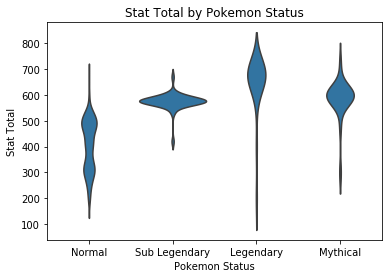

In [43]:
sb.violinplot(data=pokemon, x = 'status',y='total_points',color=base_color,inner=None)
plt.ylabel('Stat Total')
plt.xlabel('Pokemon Status')
plt.title('Stat Total by Pokemon Status');

There is a clear upward trend in overall stats/power going from Normal Pokemon up to Sub Legendary and then Legendary Pokemon. Although Mythical Pokemon are considered to be even rarer than just regular Legendary Pokemon, the plot actually shows that their total stats are typically slightly below that of regular Non-Mythical Legendaries.

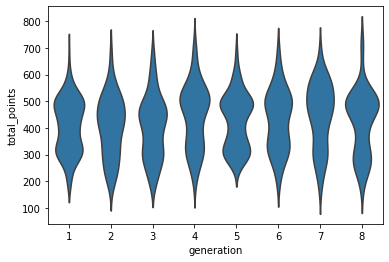

In [44]:
sb.violinplot(data=pokemon,x='generation',y='total_points',color=base_color,inner=None);

It appears that most of the generations are very well balanced against each other, all demonstrating a bimodal distribution with one peak around 300 and another around 500. Some of the more recent generations (e.g. 7 and 8) have a higher concentration around the higher stat end/~500 stat total, and generation 4 appears to have a slight edge in overall strength, but for the most part is still well balanced against the rest.

# Now let's find out if Pokemon with two types are generally stronger or have different stat distributions to that of mono type Pokemon.

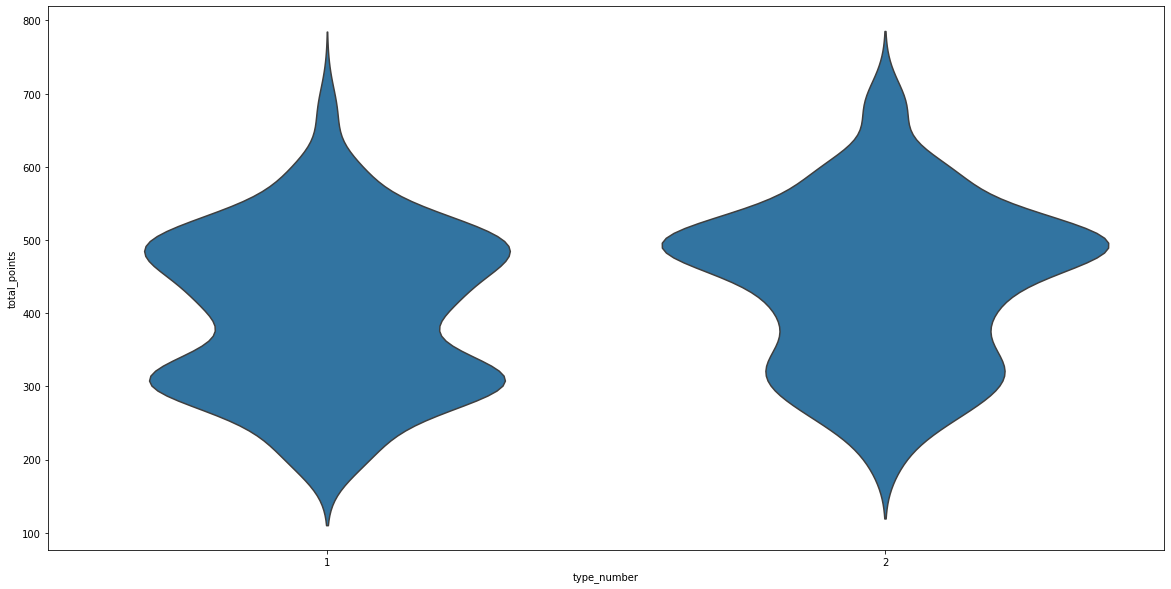

In [112]:
plt.figure(figsize=(20,10))
sb.violinplot(data = pokemon, x = 'type_number', y='total_points',color=base_color,inner=None);

A higher proportion of dual type Pokemon are ones that fall into the higher 450-550 stat total range compared to the weaker side of the spectrum that ranges from 250-350 in total. For monotype Pokemon, they demonstrate a more even bimodal distribution with around equal peaks at the 250-350 lower peak as well as the 450-550 upper peak.

# Multivariate Exploration

# Relationship between Attack and Special Attack

C:\Users\Smartjuice\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


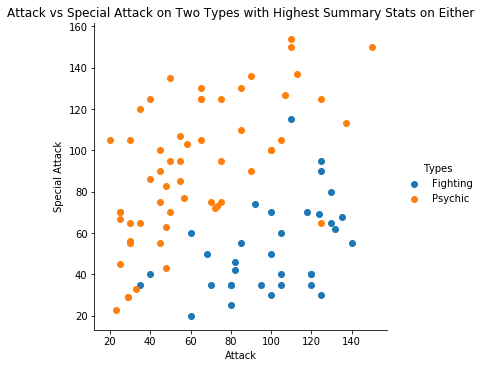

In [101]:

pokemonsub = pokemon[(pokemon['type_1'] == 'Fighting')|(pokemon['type_1'] == 'Psychic')]
g = sb.FacetGrid(data = pokemonsub, hue = 'type_1', size = 5)
g.map(plt.scatter, 'attack','sp_attack')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.title('Attack vs Special Attack on Two Types with Highest Summary Stats on Either')
g.add_legend();
g._legend.set_title('Types');

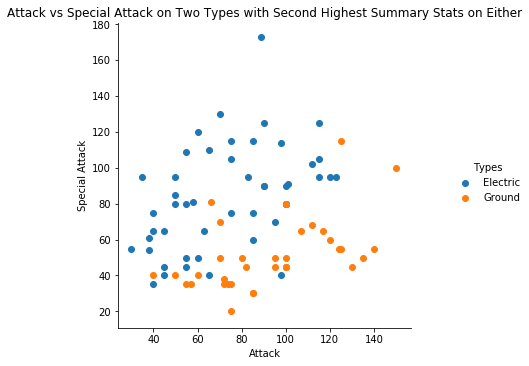

In [102]:
pokemonsub = pokemon[(pokemon['type_1'] == 'Ground')|(pokemon['type_1'] == 'Electric')]
g = sb.FacetGrid(data = pokemonsub, hue = 'type_1', size = 5)
g.map(plt.scatter, 'attack','sp_attack')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.title('Attack vs Special Attack on Two Types with Second Highest Summary Stats on Either')
g.add_legend();
g._legend.set_title('Types');

These plots seem to show a clear trend that Pokemon that have leanings towards either Attack or Special Attack tend to be significantly less proficient in the counterpart Attack stat.

# Let's see if this relationship holds true for types that prefer Defense or Special Defense

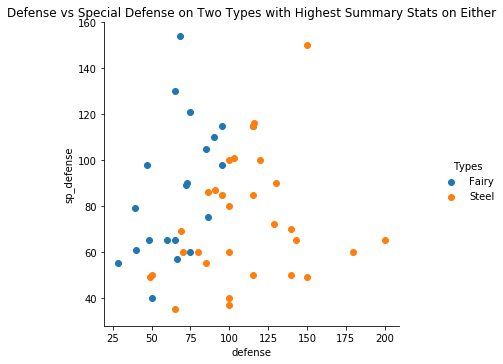

C:\Users\Smartjuice\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


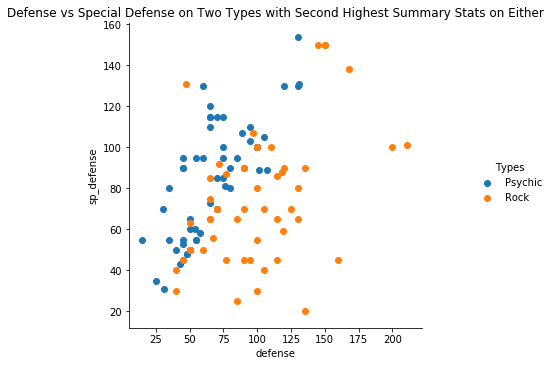

In [8]:
pokemonsub = pokemon[(pokemon['type_1'] == 'Rock')|(pokemon['type_1'] == 'Psychic')]
g = sb.FacetGrid(data = pokemonsub, hue = 'type_1', size = 5)
g.map(plt.scatter, 'defense','sp_defense')
plt.title('Defense vs Special Defense on Two Types with Second Highest Summary Stats on Either')
g.add_legend()
g._legend.set_title('Types')

# Special Status Pokemon by Generation and Type

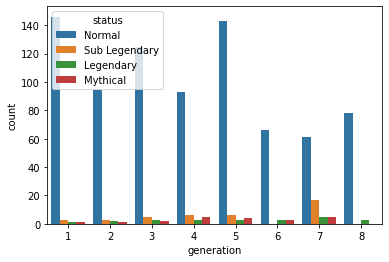

In [108]:
sb.countplot(data = pokemon, x = 'generation', hue = 'status');

This plot is a bit difficult to see so let's only take a closer look at just the non-normal Pokemon.

In [109]:
special_status_types = ['Sub Legendary','Legendary','Mythical']
status = pd.api.types.CategoricalDtype(ordered=True, categories=special_status_types)
pokemon['special_status'] = pokemon['status'].astype(status)

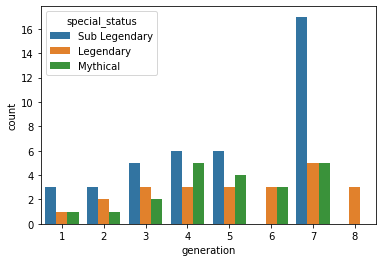

In [110]:
sb.countplot(data = pokemon, x = 'generation', hue = 'special_status');

In general, it seems that as the generations progress, Nintendo adds more special pokemon (Sub Legendary, Legendary, and Mythical) with a slight dip around Generation 6 before reaching a peak in Generation 7 and then dropping back down in Generation 8.

Now let's look at how many special pokemon there are by primary type.

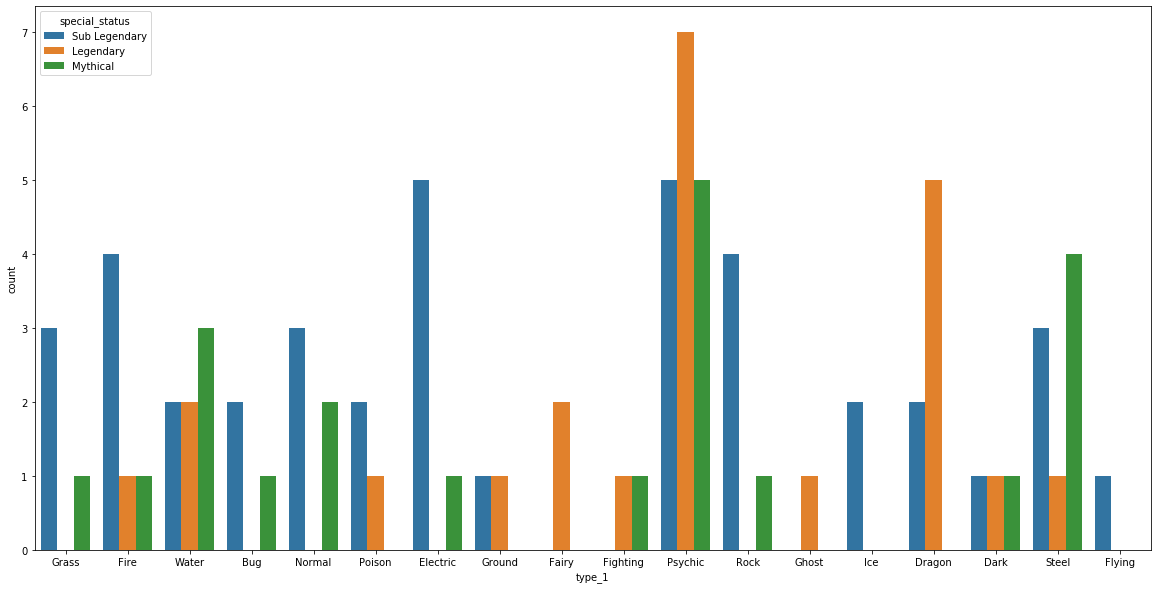

In [111]:
plt.figure(figsize=(20,10))
sb.countplot(data = pokemon, x = 'type_1', hue = 'special_status');

# How about weight and height of Pokemon? 

In [113]:
pokemon.weight_kg.describe()

count    890.000000
mean      63.911011
std      119.996331
min        0.100000
25%        8.500000
50%       26.800000
75%       63.000000
max      999.900000
Name: weight_kg, dtype: float64

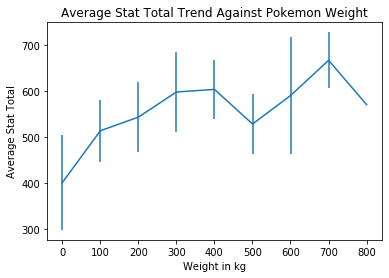

In [114]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.1, 1000, 100)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(pokemon['weight_kg'], bin_edges, include_lowest = True)

stat_mean = pokemon['total_points'].groupby(displ_binned).mean()
stat_std = pokemon['total_points'].groupby(displ_binned).std()

plt.errorbar(x=bin_centers, y=stat_mean, yerr=stat_std);
plt.xlabel('Weight in kg')
plt.ylabel('Average Stat Total')
plt.title('Average Stat Total Trend Against Pokemon Weight');

There is an overall upwards trend between Pokemon weights and average stat total/strength.

In [115]:
pokemon.height_m.describe()

count    890.000000
mean       1.182135
std        1.238048
min        0.100000
25%        0.500000
50%        1.000000
75%        1.500000
max       20.000000
Name: height_m, dtype: float64

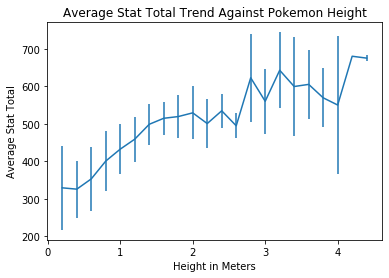

In [116]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.1, 4.6+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(pokemon['height_m'], bin_edges, include_lowest = True)
stat_mean = pokemon['total_points'].groupby(displ_binned).mean()
stat_std = pokemon['total_points'].groupby(displ_binned).std()

plt.errorbar(x=bin_centers, y=stat_mean, yerr=stat_std);
plt.xlabel('Height in Meters')
plt.ylabel('Average Stat Total')
plt.title('Average Stat Total Trend Against Pokemon Height');

Likewise to weight, there is an upwards trend between Pokemon height and average stat total/strength. 